## PictureBook_Classification_2021

source: https://github.com/biranchi2018/Multi-Label-Image-Classification-on-Movies-Poster-using-CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
print(tf.__version__)

2.0.0-rc0


In [2]:
# CSV data path
# /output_1.csv /output_2.csv /output_3.csv
data = pd.read_csv('./../result/output_1.csv')
data.shape

(4268, 14)

In [3]:
data.head()

,Id,Genre,happiness,love,trust,optimism,sadness,fear,disgust,anger,lost,surprise,touched,peace
0,0,"['trust', 'optimism']",0,0,1,1,0,0,0,0,0,0,0,0
1,1,"['happiness', 'optimism']",1,0,0,1,0,0,0,0,0,0,0,0
2,2,"['love', 'peace']",0,1,0,0,0,0,0,0,0,0,0,1
3,3,['optimism'],0,0,0,1,0,0,0,0,0,0,0,0
4,4,['optimism'],0,0,0,1,0,0,0,0,0,0,0,0


In [4]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
    # Data base path
    path = './../picturebook2021nthu/suychenmxnthu/%05d.jpg' % int(data['Id'][i])
    img = image.load_img(path, target_size=(img_width, img_height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

X = np.array(X)

100%|██████████| 4268/4268 [00:19<00:00, 223.75it/s]


In [5]:
X.shape

(4268, 350, 350, 3)

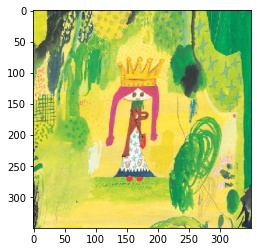

In [6]:
plt.imshow(X[3])

In [7]:
data['Genre'][3]

"['optimism']"

In [8]:
y = data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(4268, 12)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)

In [10]:
X_train[0].shape

(350, 350, 3)

### Build CNN

In [18]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = (350, 350, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#=============== Genre number ===============
model.add(Dense(12, activation='sigmoid')) 
#============================================

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization_12 (Batc (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 174, 174, 16)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_13 (Batc (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 86, 86, 32)       

In [20]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Train on 3627 samples, validate on 641 samples
Epoch 1/15
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
3627/3627 [==============================] - 138s 38ms/sample - loss: 0.8261 - accuracy: 0.5663 - val_loss: 1.2379 - val_accuracy: 0.5861
Epoch 2/15
3627/3627 [==============================] - 125s 35ms/sample - loss: 0.5242 - accuracy: 0.7602 - val_loss: 0.3243 - val_accuracy: 0.9004
Epoch 3/15
3627/3627 [==============================] - 126s 35ms/sample - loss: 0.3618 - accuracy: 0.8736 - val_loss: 0.2978 - val_accuracy: 0.9007
Epoch 4/15
3627/3627 [==============================] - 127s 35ms/sample - loss: 0.3252 - accuracy: 0.8899 - val_loss: 0.2957 - val_accuracy: 0.9008
Epoch 5/15
3627/3627 [==============================] - 128s 35ms/sample - loss: 0.3145 - accuracy: 0.8934 - val_loss: 0.2930 - val_accuracy: 0.9007
Epoch 6/15
3627/3627 [==============================] - 127s 35ms/sample - loss: 0.3072 - accuracy: 0.8950 - val_l

In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [23]:
def plot_learningCurve(history, epoch):
    # Plot training & validation accuracy values    
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

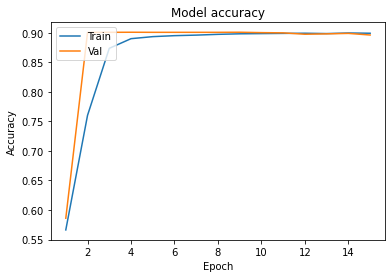

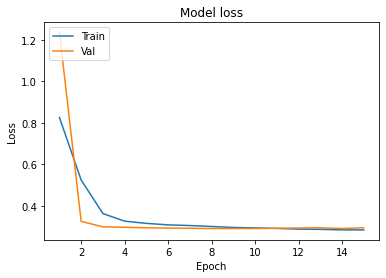

In [24]:
plot_learningCurve(history, 15)

In [28]:
model.save_weights('model2021')

### Testing of model

Index(['happiness', 'love', 'trust', 'optimism', 'sadness', 'fear', 'disgust',
       'anger', 'lost', 'surprise', 'touched', 'peace'],
      dtype='object')
trust 0.30873185
fear 0.2728805
peace 0.23409612


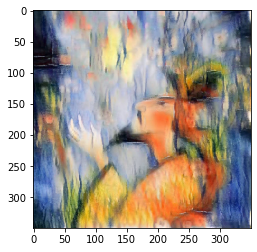

In [69]:
img_width = 350
img_height = 350
img = image.load_img('./test_image/test/17.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
    print(classes[top3[i]],y_prob[0][top3[i]])